# What makes pokemon legendary

This project consists of various tasks which will be in different fields. First thing is we have only dataset of ~800 pokemons. As we may remember 1st generation pokemons are quite simple but further ones are more or less unknown. So we need to focus on analyzing this dataset to gather insights and move on to other stage. Next phase is about prediction to actually see if we can predict if pokemon with list of given attribute values can be legendary. Moving on we would like to gather our knowledge and create dashboard with couple graphs. Last but not least is creating web app to combine dashboard and use of trained model so anyone can play with it. 

## List of tasks
1. Analysis
    1. Number of Legendary Pokemons
    2. Analysing Legendary Pokemons by height, type, weight and fightning stats
    3. Creating datasets for training and testing
2. Prediction
    1. Choosing model
    2. Fit model
    3. Analyzing variable importance
    4. Conclusion
3. Dashboard
    1. Dash app
    2. Creating graphs with plotly which will be used in app
4. Web App
    1. Combining dash app with prediction model
    2. Frontend modifications
    3. Deployment on server (maybe)

## 1. Introduction
First we need to prepare our environment so let's start with importing libraries and our dataset

Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
pokemon_dataset = pd.read_csv('pokemon.csv')

In [3]:
pokemon_dataset.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
pokemon_dataset.keys()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
pokemon_dataset['name'].head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: name, dtype: object

In [6]:
pokemon_dataset['type1'].head()

0    grass
1    grass
2    grass
3     fire
4     fire
Name: type1, dtype: object

In [9]:
pokemon_dataset_val_count = pokemon_dataset['type1'].value_counts()
pokemon_dataset_val_count

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

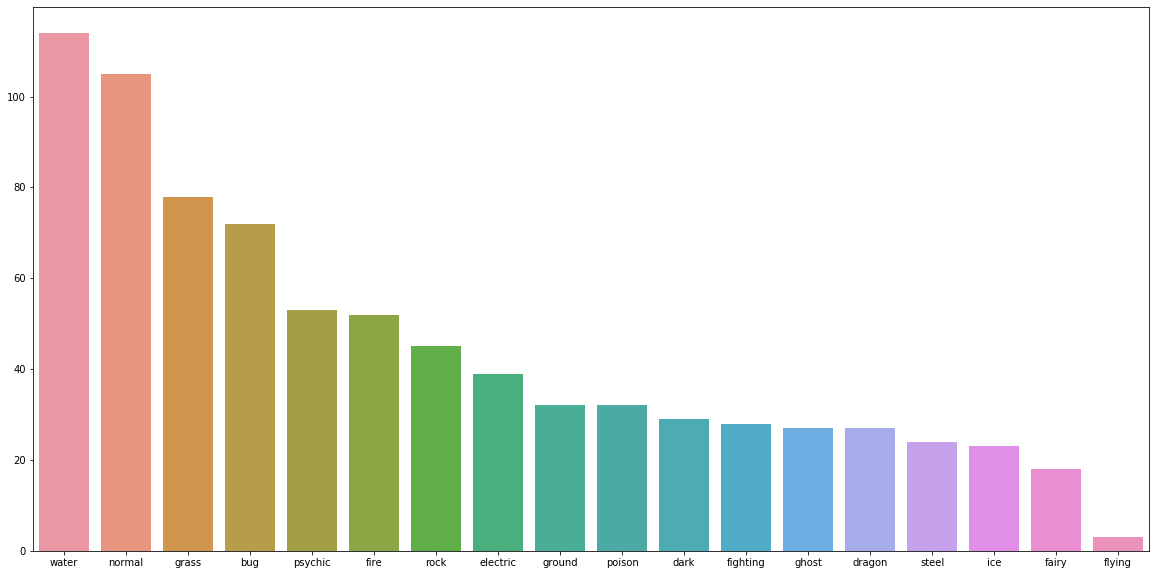

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x = pokemon_dataset_val_count.index, y = pokemon_dataset_val_count.values)